In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler, PowerTransformer

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
np.mean(df['rings'])

9.933684462532918

# EDA

In [4]:
df.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [5]:
df.sex = df.sex.replace('M', 0)
df.sex = df.sex.replace('F', 1)
df.sex = df.sex.replace('I', 2)

In [6]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

<AxesSubplot: xlabel='rings', ylabel='length'>

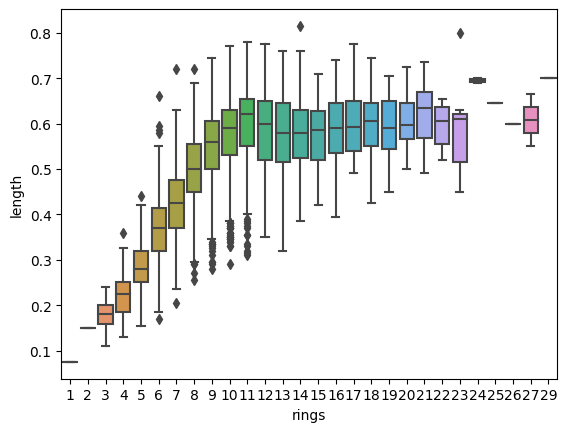

In [7]:
sns.boxplot(x='rings', y="length", data=df)

<AxesSubplot: xlabel='rings', ylabel='diameter'>

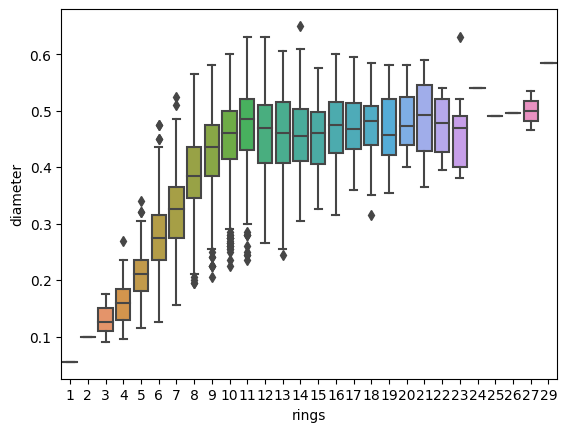

In [8]:
sns.boxplot(x='rings', y="diameter", data=df)

<AxesSubplot: xlabel='rings', ylabel='height'>

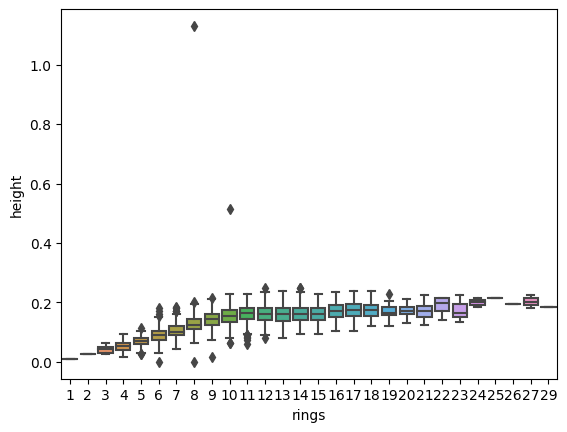

In [9]:
sns.boxplot(x='rings', y="height", data=df)

<AxesSubplot: xlabel='rings', ylabel='whole_weight'>

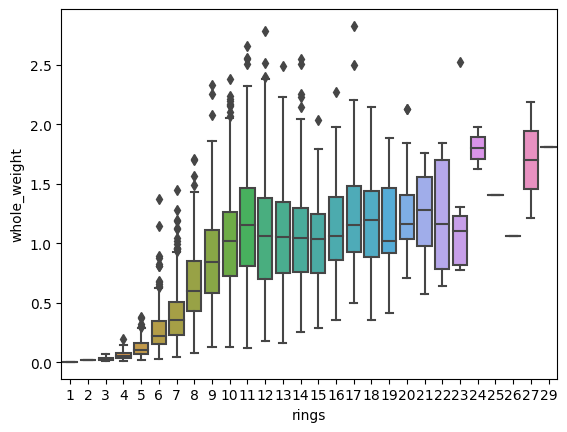

In [10]:
sns.boxplot(x='rings', y="whole_weight", data=df)

<AxesSubplot: xlabel='rings', ylabel='shucked_weight'>

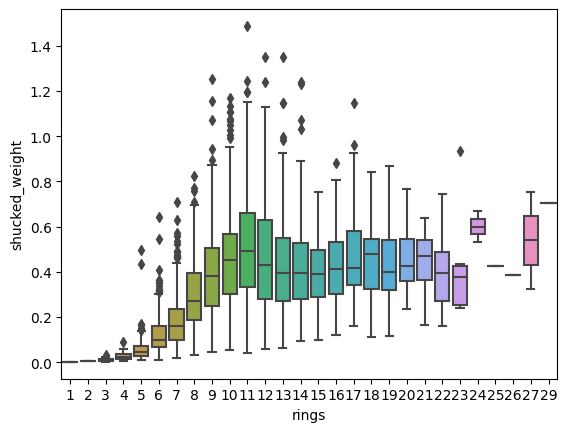

In [11]:
sns.boxplot(x='rings', y="shucked_weight", data=df)

<AxesSubplot: xlabel='rings', ylabel='viscera_weight'>

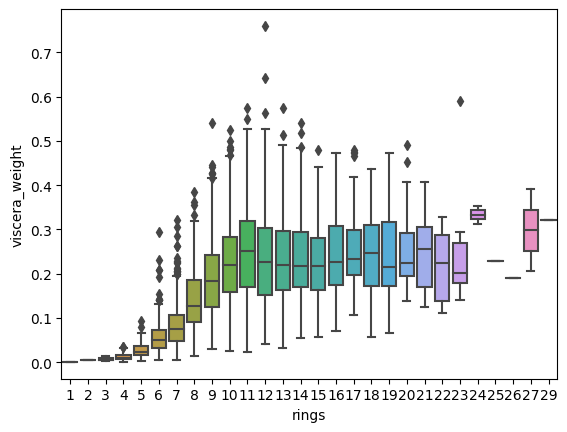

In [12]:
sns.boxplot(x='rings', y="viscera_weight", data=df)

<AxesSubplot: xlabel='rings', ylabel='shell_weight'>

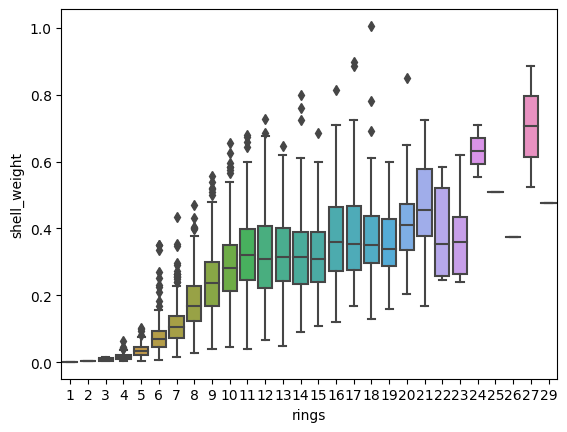

In [13]:
sns.boxplot(x='rings', y="shell_weight", data=df)

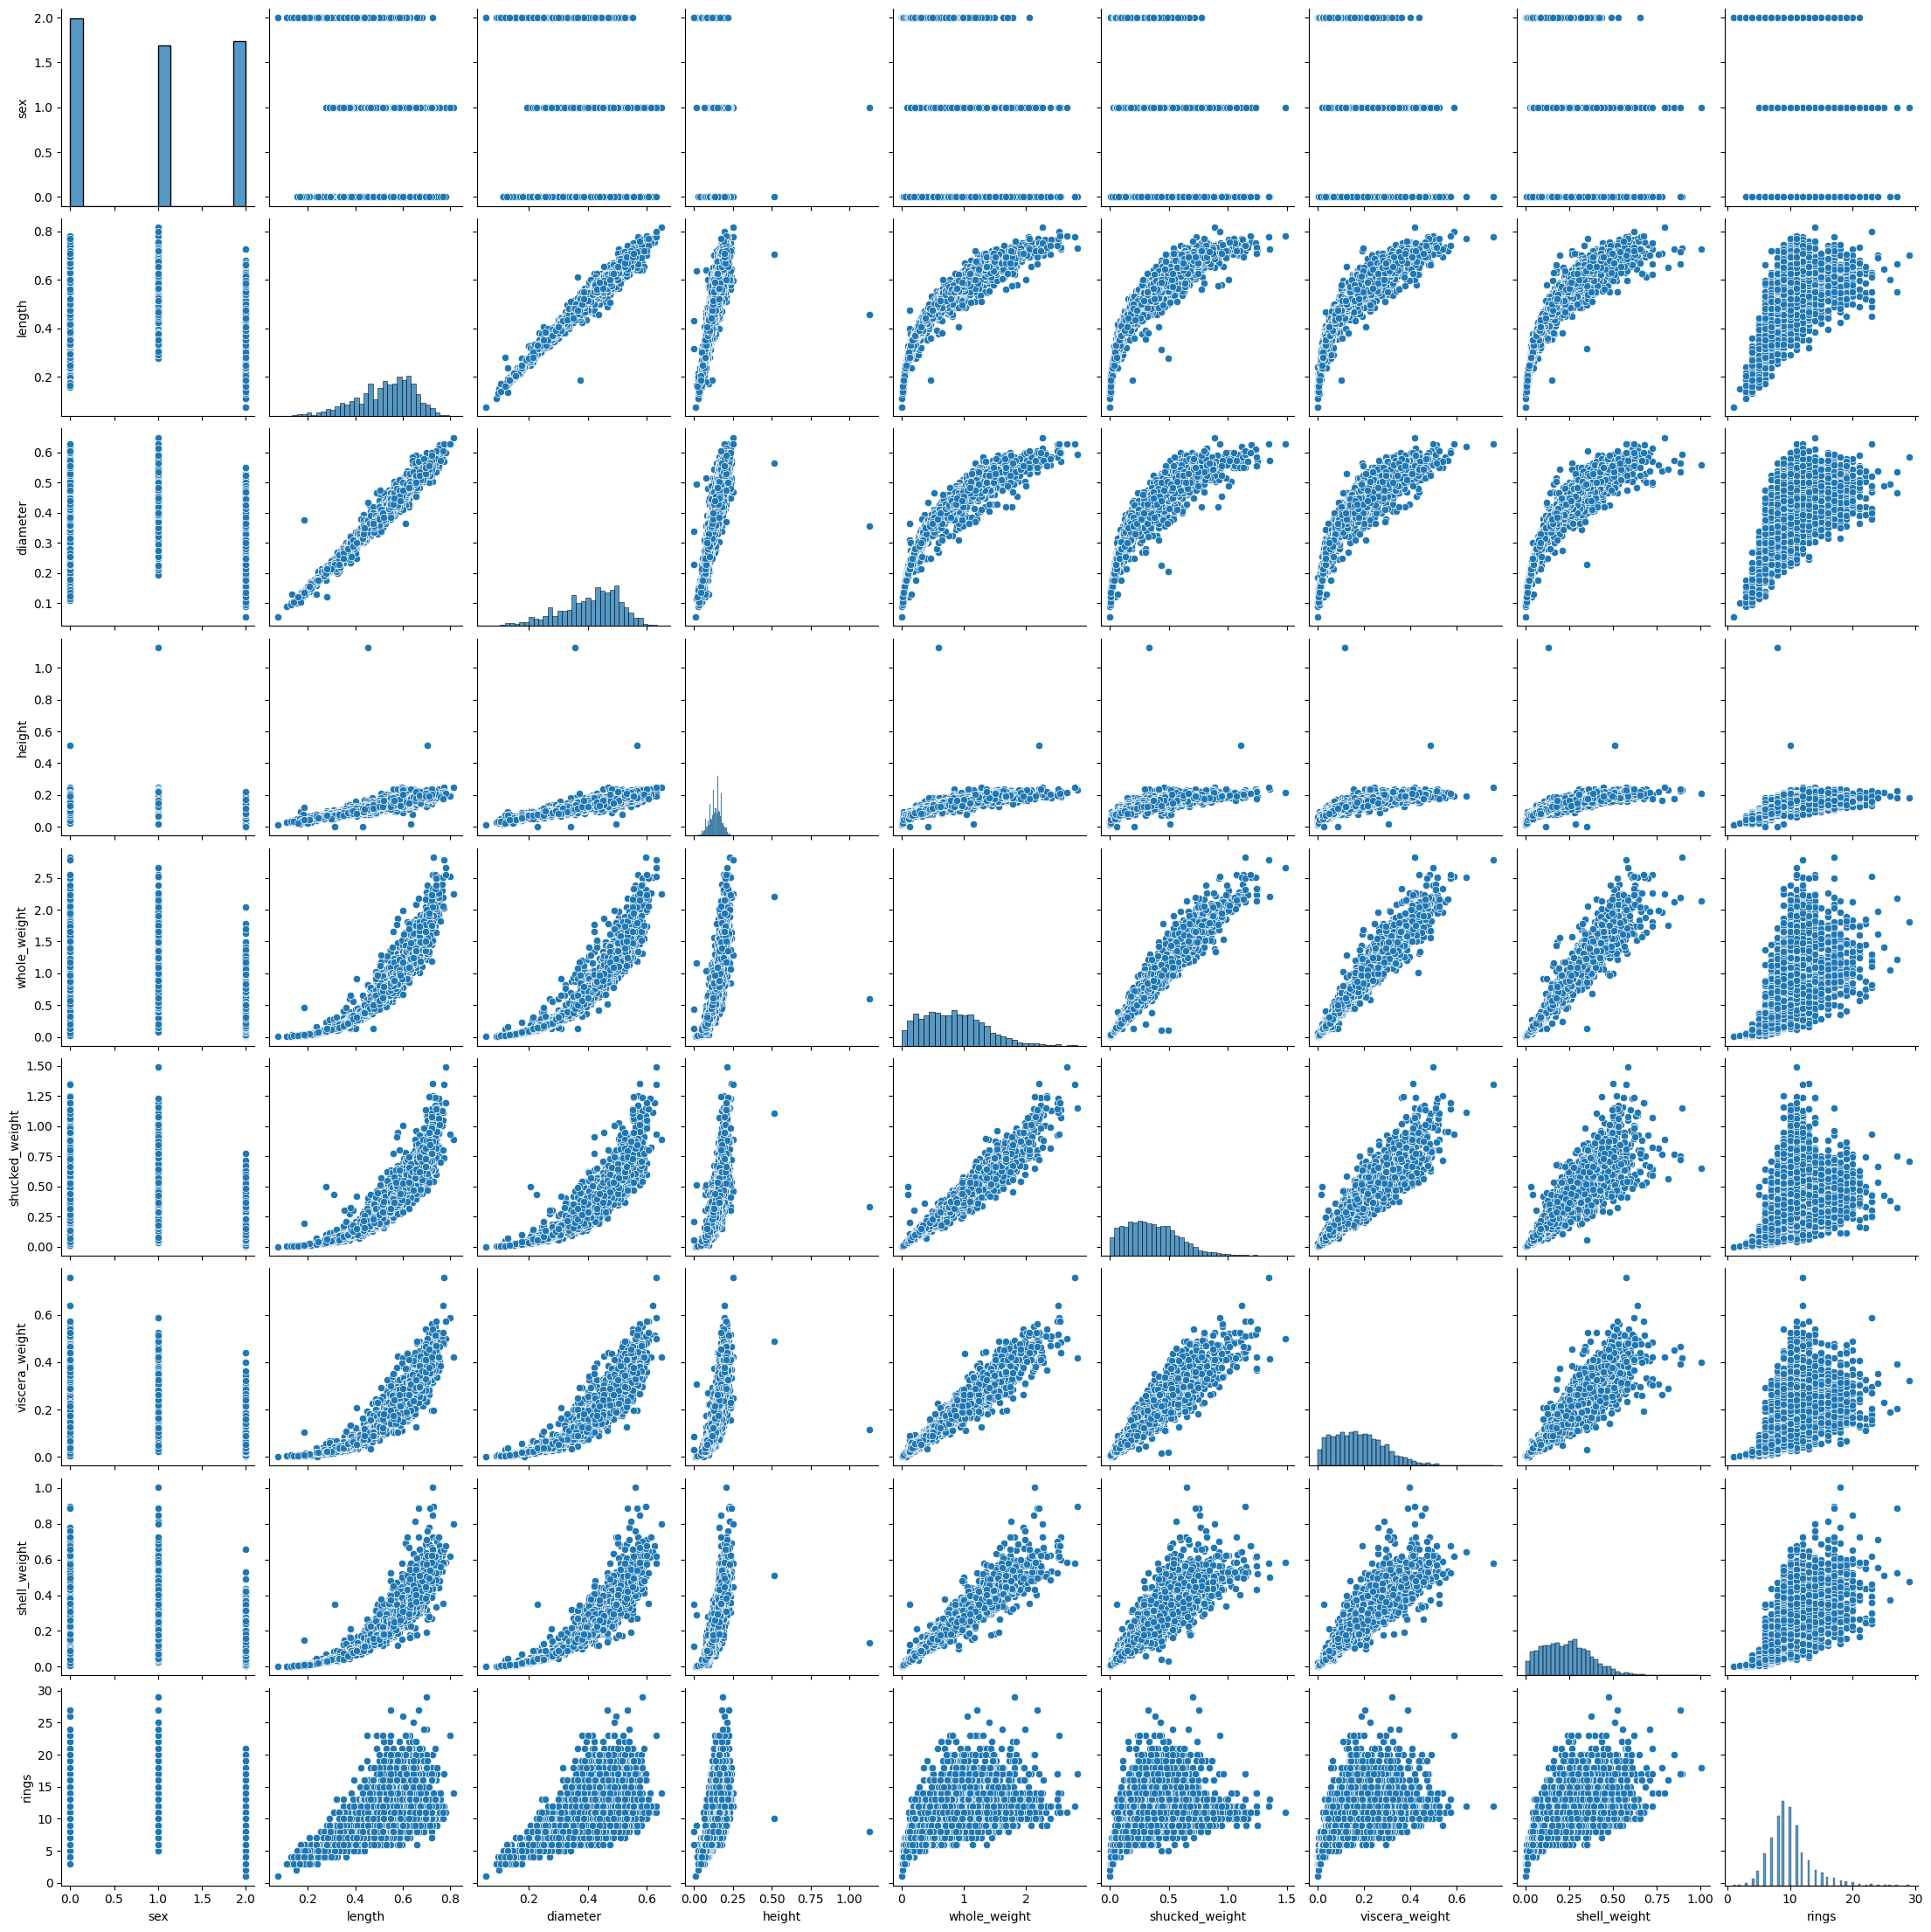

In [14]:
sns.pairplot(df[df.columns])

## Correlation

<AxesSubplot: >

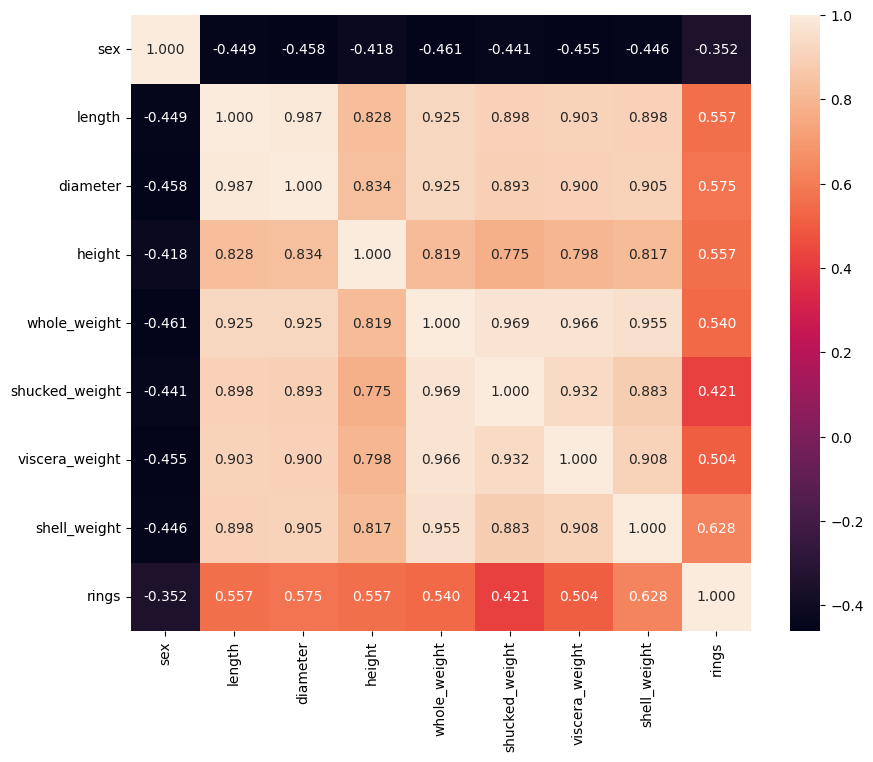

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

## Outliers

In [16]:
def identify_outliers(data):
    lower = data.quantile(0.05) - 1.5 * stats.iqr(data)
    upper = data.quantile(0.95) + 1.5 * stats.iqr(data)

    return lower, upper, len(data[(data < lower) | (data > upper)])

In [17]:
def identify_outliers_a(data):
    lower, upper = np.quantile(data, [0.05, 0.95])
    
    return data[(data < lower) | (data > upper)]

In [18]:
def outlierMean(df):
    for col in df.columns[:-1]:
        lower, upper, num_outliers = identify_outliers(df[col])
        print(f"lower:{lower}, upper:{upper}")
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
        print(f"{num_outliers} values modified for {col}")
    return df

In [19]:
df.describe()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [20]:
df = outlierMean(df)

lower:-3.0, upper:5.0
0 values modified for sex
lower:0.047500000000000014, upper:0.9374999999999999
0 values modified for length
lower:0.024999999999999994, upper:0.74
0 values modified for diameter
lower:-1.3877787807814457e-17, upper:0.275
2 values modified for height
lower:-0.94135, upper:2.7621499999999988
2 values modified for whole_weight
lower:-0.4216, upper:1.2142
8 values modified for shucked_weight
lower:-0.21225000000000002, upper:0.6188499999999999
2 values modified for viscera_weight
lower:-0.2601, upper:0.7785
8 values modified for shell_weight


In [21]:
df.describe()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139254,0.828723,0.359204,0.180554,0.238667,9.933684
std,0.827815,0.120093,0.099240,0.038595,0.490312,0.221269,0.109435,0.138482,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,0.275000,2.762150,1.214200,0.618850,0.778500,29.000000


### We substituted 9 outlier values with edge values

In [22]:
def powerScale(df, features):
    power = PowerTransformer(
        method='yeo-johnson', 
        standardize=True
    )
    # for col in df.columns:
    #     plots(df, col, power)
    df[df.columns] = power.fit_transform(features.values)
   
    return df

In [23]:
from sklearn.model_selection import train_test_split


# Split the dataset into input features and target labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X[X.select_dtypes(include=['float64']).columns] = X.select_dtypes(include=['float64']).astype('float32')
# X['sex'] = X['sex'].map({'M': 0, 'F': 1, 'I': 2}).astype('float32')
X = powerScale(X, X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [24]:
np.mean(y)

9.933684462532918

## Tensorflow

In [25]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

print("Available devices: %s" % tf.config.list_physical_devices())

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    strategy = tf.distribute.OneDeviceStrategy(device="/GPU:0")
else:
    strategy = tf.distribute.OneDeviceStrategy(device="/CPU:0")

Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [26]:
def build_model(hidden_size=64, learning_rate=0.01, dropout=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(hidden_size/2, activation='relu'),
        tf.keras.layers.Dense(hidden_size/4, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

In [30]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
# Stop run if there is no val_loss improvement over 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)


def train():
    # default hyperparameters
    config_defaults = {
        'learning_rate': 0.01,
        'hidden_size': 64,
        'batch_size':128,
        'dropout': 0.2
    }
    wandb.init(config=config_defaults)
    
    wandb_cb = WandbCallback()

    # Configure the model
    config = wandb.config
    with strategy.scope():
        model = build_model(hidden_size=config.hidden_size, learning_rate=config.learning_rate, dropout=config.dropout)

        # Train the model
        history = model.fit(
            X_train, 
            y_train, 
            validation_split=0.2, 
            epochs=1000, 
            batch_size=config.batch_size, 
            verbose=0, 
            callbacks=[
                early_stop,
                wandb_cb
            ])

    # Log the results
    metrics = {
        'val_loss': history.history['val_loss'][-1],
        'val_mae': history.history['val_mae'][-1]
    }
    wandb.log(metrics)

In [ ]:
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'val_mae',
        'goal': 'minimize'
    },
    'parameters': {
        'hidden_size': {
            'values': [16, 32, 64]
        },
        'learning_rate': {
            'min': 0.001,
            'max': 0.1
        },
        'dropout': {
            'values': [0.1, 0.2, 0.3]
        },
        'batch_size': {
            'values': [32, 64, 128]
        }
    }
}

sweep_id = wandb.sweep(sweep_config)

wandb.agent(sweep_id, function=train, count=10)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: tiqd3g4m
Sweep URL: https://wandb.ai/xkretinin/uncategorized/sweeps/tiqd3g4m


wandb: Agent Starting Run: uz7m8yql with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.2
wandb: 	hidden_size: 16
wandb: 	learning_rate: 0.0649303538727405


C:\Users\kreti\.conda\envs\condaProject\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171718-uz7m8yql\files\model-best)... Done. 0.0s


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁
mae,█▂▂▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▁▂▁▁▁▁▁▁▁▁▁▁
val_mae,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁
best_epoch,8
best_val_loss,4.5774
epoch,13
loss,4.93984
mae,1.58208
val_loss,4.71471


wandb: Agent Starting Run: wto36d3w with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.1
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.05778445344752437


C:\Users\kreti\.conda\envs\condaProject\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best)... Done. 0.0s


INFO:tensorflow:Assets written to: C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best\assets


wandb: Adding directory to artifact (C:\Programming\NN_cvika\NN2023_MLP_abalone_age_prediction\wandb\run-20230322_171754-wto36d3w\files\model-best)... Done. 0.0s


## PyTorch

In [29]:
import wandb
import torch.nn as nn
import torch.optim as optim
import torch
from pprint import pprint

api = wandb.Api()
sweep = api.sweep('xkretinin/uncategorized/sweeps/jpuscrsx')

best_config = sweep.best_run().config
pprint(best_config)

wandb.init(config=best_config)
best_config = wandb.config

# default hyperparameters
config = {
    'learning_rate': 0.09599,
    'hidden_size': 32,
    'epochs': 100
}

# Configure the model
model = nn.Sequential(
    nn.Linear(8, best_config.hidden_size),
    nn.ReLU(),
    nn.Linear(best_config.hidden_size, best_config.hidden_size//2),
    nn.ReLU(),
    nn.Linear(best_config.hidden_size//2, 1)
)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=best_config.learning_rate)
batch_size = 128

for epoch in range(best_config.epochs):
    running_mae = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get a batch of data
        inputs = torch.tensor(X_train.iloc[i:i+batch_size].values, dtype=torch.float32)
        labels = torch.tensor(y_train.iloc[i:i+batch_size].values, dtype=torch.float32)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass, backward pass, and optimization
        outputs = model(inputs)
        mae = criterion(outputs, labels.view(-1, 1))
        mae.backward()
        optimizer.step()

        # Accumulate loss and MAE for this batch
        running_mae += mae

    # Print the average loss for this epoch
    avg_mae = running_mae / len(X_train)
    wandb.log({'mae': avg_mae})

# Evaluate the model on the test set
with torch.no_grad():
    inputs = torch.tensor(X_test.values, dtype=torch.float32)
    labels = torch.tensor(y_test.values, dtype=torch.float32)
    outputs = model(inputs)
    mae = criterion(outputs, labels.view(-1, 1))
    wandb.log({'test_mae': mae})

wandb: Sorting runs by +summary_metrics.val_mae


{'epochs': 100, 'hidden_size': 32, 'learning_rate': 0.09599149727636776}
